# Real-World Use Cases and Projects
### 1. Exploratory Data Analysis (EDA) with Pandas
EDA involves understanding the data through visualizations and summary statistics.


In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load a sample dataset
df_eda = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')

# Display the first 5 rows
df_eda.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: title={'center': 'Count of Visits per Day'}, xlabel='day'>

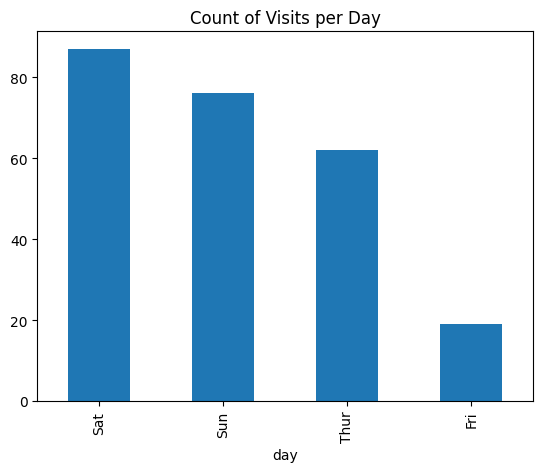

In [3]:
# Summary statistics of the dataset
df_eda.describe()

# Checking for missing values
df_eda.isnull().sum()

# Plotting basic visualizations
df_eda['day'].value_counts().plot(kind='bar', title='Count of Visits per Day')

### 2. Data Cleaning in Real-World Projects
Real-world data often contains inconsistencies, missing values, and errors that need to be addressed.

In [4]:
# Sample DataFrame with messy data
df_dirty = pd.DataFrame({
    'Name': ['John', 'Anna', None, 'Mike ', '   Emily'],
    'Age': [28, 22, 35, None, 32],
    'Salary': ['1000$', '1500$', '1200$', None, '2000']
})

# Stripping whitespace and filling missing values
df_dirty['Name'] = df_dirty['Name'].str.strip()
df_dirty['Age'] = df_dirty['Age'].fillna(df_dirty['Age'].mean())

# Converting `Salary` to numeric
df_dirty['Salary'] = df_dirty['Salary'].str.replace('$', '').astype(float)
df_dirty

,Name,Age,Salary
0,John,28.00,1000.0
1,Anna,22.00,1500.0
2,None,35.00,1200.0
3,Mike,29.25,NaN
4,Emily,32.00,2000.0


### 3. Financial Data Analysis with Pandas
Pandas can be used for analyzing stock prices, financial ratios, and returns.

<Axes: title={'center': 'Stock Prices'}>

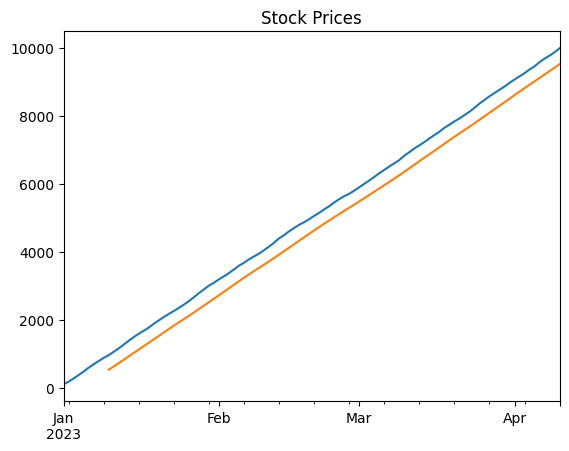

In [5]:
# Generating synthetic financial data
dates = pd.date_range('2023-01-01', periods=100)
prices = pd.Series((np.random.randn(100) * 10 + 100).cumsum(), index=dates)

# Calculating daily returns
returns = prices.pct_change()

# Simple moving average (SMA)
sma = prices.rolling(window=10).mean()

# Visualizing price and SMA
prices.plot(title='Stock Prices')
sma.plot(label='10-day SMA')

### 4. Handling Web Scraped Data
Web scraping allows collecting data from the web; Pandas can help clean and structure it.

In [6]:
import requests
from bs4 import BeautifulSoup

# Example: Scraping table data from a webpage
url = 'https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Finding the first table
table = soup.find_all('table')[0]

# Using Pandas to parse the table
df_scraped = pd.read_html(str(table))[0]
df_scraped.head()


C:\Users\SP23-RAI-014.CUI\AppData\Local\Temp\ipykernel_10604\1447338012.py:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_scraped = pd.read_html(str(table))[0]


,Unnamed: 0,Location,Population,% of world,Date,Source (official or from the United Nations),Notes
0,–,World,8119000000,100%,1 Jul 2024,UN projection[1][3],NaN
1,1/2 [b],China,1409670000,17.3%,31 Dec 2023,Official estimate[5],[c]
2,1/2 [b],India,1404910000,17.3%,1 Jul 2024,Official projection[6],[d]
3,3,United States,335893238,4.1%,1 Jan 2024,Official estimate[7],[e]
4,4,Indonesia,281603800,3.5%,1 Jul 2024,National annual projection[8],NaN


### 5. Working with Geospatial Data
Pandas can handle geospatial data, especially when combined with libraries like `geopandas`.<br>
Download data set from <a href="https://www.naturalearthdata.com/downloads/110m-cultural-vectors/">Download</a>

<Axes: >

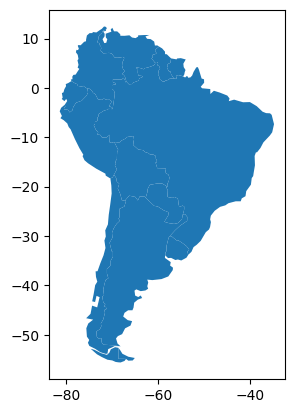

In [7]:
import geopandas as gpd

# Loading the world dataset directly using geopandas
world = gpd.read_file('data/local/geo/ne_110m_admin_0_countries.shp')

# List of South American countries
south_american_countries = [
    'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia',
    'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname',
    'Uruguay', 'Venezuela','pakistan'
]
# Filtering the GeoDataFrame for South American countries
south_america = world[world['ADMIN'].isin(south_american_countries)]

# Plotting the geospatial data
south_america.plot()




### 6. Time Series Analysis for Stock Prices
Time series analysis is essential in financial data analysis, using resampling, rolling statistics, and trend detection.

C:\Users\SP23-RAI-014.CUI\AppData\Local\Temp\ipykernel_10604\1732563285.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_prices = stock_prices.resample('M').mean()


<Axes: xlabel='Date'>

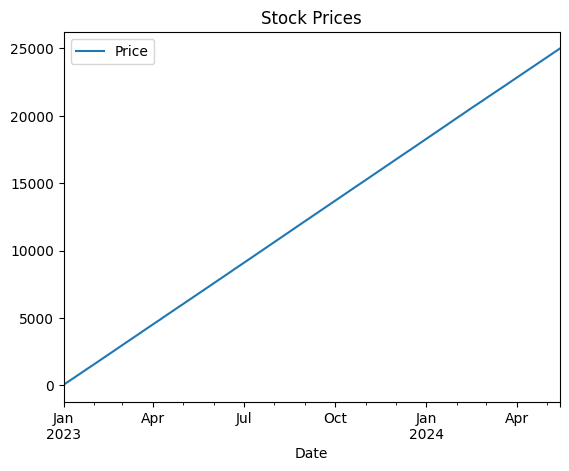

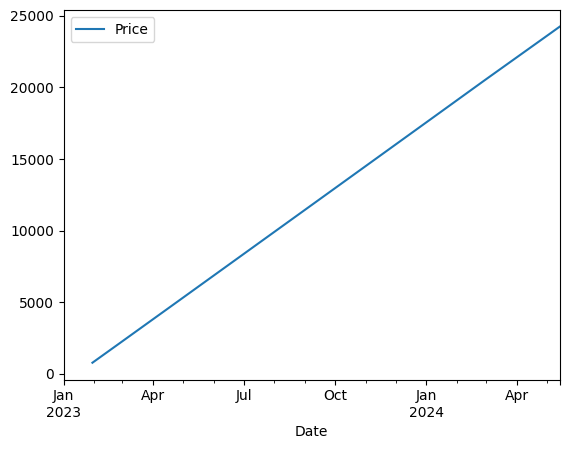

In [8]:
# Generating synthetic stock data
date_range = pd.date_range('2023-01-01', periods=500)
stock_prices = pd.DataFrame({
    'Date': date_range,
    'Price': (np.random.randn(500) * 2 + 50).cumsum()
})
stock_prices.set_index('Date', inplace=True)

# Resampling stock prices to monthly frequency
monthly_prices = stock_prices.resample('M').mean()

# Rolling mean and trend detection
rolling_avg = stock_prices.rolling(window=30).mean()

# Visualizing the stock prices and rolling average
stock_prices.plot(title='Stock Prices')
rolling_avg.plot(label='30-day Rolling Average')

### 7. Building Simple Dashboards with Pandas and Matplotlib
A basic dashboard can be built using Pandas and Matplotlib to visualize key data insights.

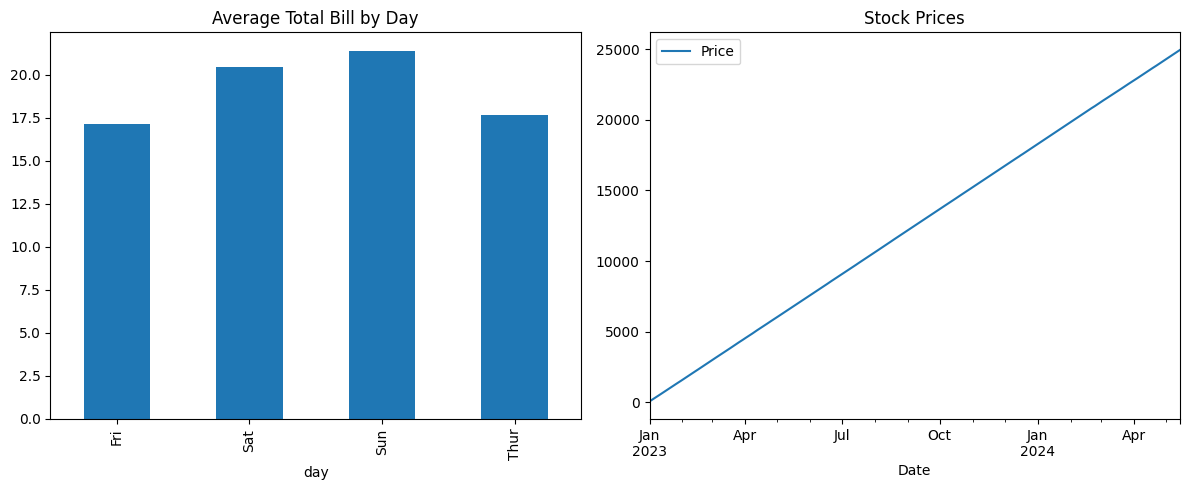

In [9]:
import matplotlib.pyplot as plt

# Creating subplots for a dashboard
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot: Average total bill by day (from the tips dataset)
df_eda.groupby('day')['total_bill'].mean().plot(kind='bar', ax=ax[0], title='Average Total Bill by Day')

# Line plot: Stock prices trend (synthetic data)
stock_prices.plot(ax=ax[1], title='Stock Prices')

plt.tight_layout()
plt.show()

### 8. Case Studies and Sample Projects
Working on real-world case studies to apply the learned concepts and build end-to-end data projects.

#### Case Study: Analyzing E-Commerce Sales 
##### Objective
#### Explore and analyze an e-commerce sales dataset to understand the revenue generated, peak sales times, and most popular products.
##### Steps:
##### 1. **Load the dataset** - Read CSV data of e-commerce sales.
##### 2. **Data Cleaning** - Handle missing values, remove duplicates.
##### 3. **Exploratory Data Analysis** - Analyze revenue, sales trends by day/week, and top-selling products.
##### 4. **Visualize** - Create visualizations like bar plots for product sales and line plots for revenue over time.
##### 5. **Insights & Reporting** - Summarize key findings and business insights.
